/home/mbg/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


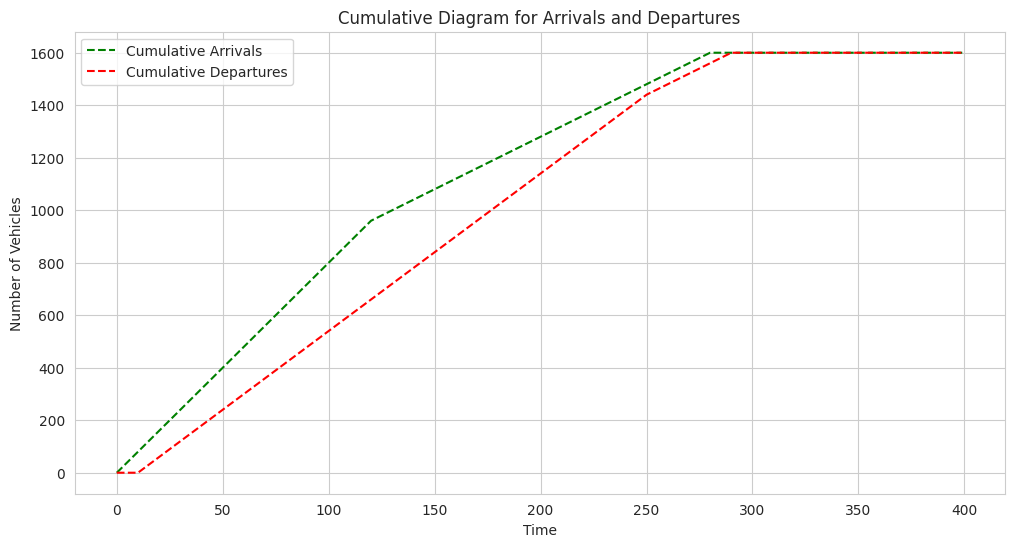

Vehicles passed through the link at t=300: 1600
Vehicle 216 arrives at time: 27
Vehicle 216 departs at time: 46
Hence, travel time is: 19


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Define constants
T_0 = 10  # Free flow travel time (time units)
CAPACITY = 6  # Vehicles per time unit
TIME_STEPS = 400  # Simulation time steps

# Function to initialize dataframe
def initialize_dataframe():
    """
    Creates a DataFrame with time steps and demand based on conditions.
    """
    df = pd.DataFrame({'Time': range(TIME_STEPS)})
    df["Demand"] = np.where((df["Time"] >= 1) & (df["Time"] <= 120), 8, 
                  np.where((df["Time"] >= 121) & (df["Time"] <= 280), 4, 0))
    
    df["Arrival"] = df["Demand"].cumsum()  # Cumulative arrivals
    df["Departure"] = 0  # Placeholder for departures
    df["System"] = 0  # Vehicles in the system ready to depart
    df["DepFlow"] = 0  # Vehicles departing in current time slot
    
    return df

# Function to calculate departures and vehicles in system
def compute_departures(df):
    """
    Computes cumulative departures and vehicles in the system.
    """
    for i in range(T_0, TIME_STEPS):
        df.loc[i, "System"] = df.loc[i - T_0, "Arrival"] - df.loc[i - 1, "Departure"]
        df.loc[i, "DepFlow"] = min(df.loc[i, "System"], CAPACITY)
        df.loc[i, "Departure"] = df.loc[i - 1, "Departure"] + df.loc[i, "DepFlow"]
    
    return df

# Function to plot cumulative arrivals and departures
def plot_cumulative_diagram(df):
    """
    Plots cumulative arrivals and departures over time.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(df["Time"], df["Arrival"], label="Cumulative Arrivals", color="green", linestyle="--")
    plt.plot(df["Time"], df["Departure"], label="Cumulative Departures", color="red", linestyle="--")
    
    plt.title("Cumulative Diagram for Arrivals and Departures")
    plt.xlabel("Time")
    plt.ylabel("Number of Vehicles")
    plt.legend()
    plt.show()

# Function to compute vehicle travel time
def compute_travel_time(df, vehicle_number):
    """
    Computes the travel time for a given vehicle number.
    """
    arrival_time = df.loc[df["Arrival"] >= vehicle_number, "Time"].iloc[0]
    departure_time = df.loc[df["Departure"] >= vehicle_number, "Time"].iloc[0]
    travel_time = departure_time - arrival_time
    
    print(f"Vehicle {vehicle_number} arrives at time: {arrival_time}")
    print(f"Vehicle {vehicle_number} departs at time: {departure_time}")
    print(f"Hence, travel time is: {travel_time}")

# Main function
def main():
    df = initialize_dataframe()
    df = compute_departures(df)
    
    # Plot results
    plot_cumulative_diagram(df)
    
    # Compute outputs
    print(f"Vehicles passed through the link at t=300: {df.loc[300, 'Departure']}")
    compute_travel_time(df, vehicle_number=216)

# Run script
if __name__ == "__main__":
    main()